---
### 승준/민준 점수표 시각화 분석  
> * 자료출처 : 2017년 1학기 점수표  
> * 분석내용 : 과목별, 과목상세평가별, 지필/수행별 점수 현황

---

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns     # seaborn으로 보여주기

from matplotlib import rcParams, style
style.use('ggplot')

import matplotlib.font_manager as fm
font_location = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
# 한글 폰트 설명 : https://ansuchan.com/matplotlib-with-korean/

---
### 0. 데이터 읽기 & EDA

---

In [259]:
df = pd.read_csv("sons_score.txt", sep=',')
df.head()

,name,sub1,sub_group,sub2,wt,score_fulll,score,score100,score100_wt,credit,class_avg,class_std
0,윤민준,국어,지필,1학기기말고사,0.500,100,77,77.0,38.5,D,68.4,19.1
1,윤민준,국어,수행,말하기듣기,0.125,25,5,20.0,2.5,NaN,NaN,NaN
2,윤민준,국어,수행,포트폴리오,0.125,25,18,72.0,9.0,NaN,NaN,NaN
3,윤민준,국어,수행,일기독서,0.125,25,11,44.0,5.5,NaN,NaN,NaN
4,윤민준,국어,수행,진로탐색,0.125,25,15,60.0,7.5,NaN,NaN,NaN


In [23]:
# 데이터 형식 제대로 읽혔는지 확인 => OK
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 12 columns):
name           89 non-null object
sub1           89 non-null object
sub_group      89 non-null object
sub2           89 non-null object
wt             89 non-null float64
score_fulll    89 non-null int64
score          89 non-null int64
score100       89 non-null float64
score100_wt    89 non-null float64
credit         19 non-null object
class_avg      15 non-null float64
class_std      15 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 8.4+ KB


In [24]:
# 수치형 변수
df.describe()

,wt,score_fulll,score,score100,score100_wt,class_avg,class_std
count,89.000000,89.000000,89.000000,89.00000,89.000000,15.000000,15.000000
mean,0.213483,49.438202,40.146067,77.58427,17.115169,70.940000,21.120000
std,0.133819,33.612415,31.008998,19.21409,12.157448,3.667385,3.981062
min,0.050000,10.000000,0.000000,0.00000,0.000000,64.500000,16.400000
25%,0.100000,20.000000,16.000000,70.00000,8.000000,68.600000,17.650000
50%,0.150000,40.000000,24.000000,80.00000,12.600000,71.200000,21.100000
75%,0.300000,100.000000,72.000000,90.00000,25.500000,71.950000,23.500000
max,0.500000,100.000000,100.000000,100.00000,50.000000,78.000000,28.600000


In [43]:
var_nm = ['name', 'sub1', 'sub_group', 'sub2', 'credit']

for n in var_nm:
    print(df[n].value_counts())
    print('-'*50)    

윤민준    45
윤승준    44
Name: name, dtype: int64
--------------------------------------------------
국어      11
기술가정    11
영어      10
체육      10
과학      10
수학       9
사회       8
미술       5
음악       4
역사       4
한문       4
도덕       3
Name: sub1, dtype: int64
--------------------------------------------------
수행    64
지필    25
Name: sub_group, dtype: int64
--------------------------------------------------
1학기기말고사      19
포트폴리오         7
1학기중간고사       6
과정평가          5
학습과정평가        3
진로탐색          3
듣기            2
말하기듣기         2
태도            2
셔틀런           2
말하기           2
관찰평가_기술       1
가족보고서         1
협력 및 의사소통     1
실험수행          1
과정이행          1
힘합력           1
수업태도          1
보고서 평가        1
목공실습          1
일기독서          1
풋살            1
판소리           1
현미경세포         1
조소            1
발명아이디어        1
스포츠감상         1
여행계획서         1
쓰기            1
진로관련쓰기        1
개인학습활동        1
수업참여도         1
스포츠진로탐색       1
디자인           1
이어달리기         1
높이뛰기          1
진로탐색 수행       1
광물암석분

---
### 1. 과목별 점수
- groupby로 집계표 생성

---

In [49]:
sub_sum = pd.crosstab(df['sub1'], df['name'], values=df['score100_wt'], aggfunc=sum)
sub_sum

name,윤민준,윤승준
sub1,,
과학,70.0,85.00
국어,63.0,75.70
기술가정,69.5,83.00
도덕,NaN,86.00
미술,79.5,NaN
사회,50.5,84.05
수학,89.5,93.80
역사,NaN,90.80
영어,89.5,92.40


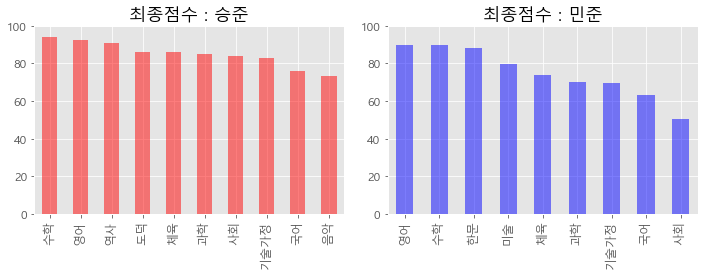

In [110]:
# 점수 내림차순으로 데이터 정리
# 결측제거, Y축을 100점, 컬러 다르게 주기, X축 제목 삭제
ysj = sub_sum['윤승준'].dropna().sort_values(ascending=False)
ymj = sub_sum['윤민준'].dropna().sort_values(ascending=False)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ysj.plot(kind='bar', ax=axes[0], color='red', alpha=0.5)
ymj.plot(kind='bar', ax=axes[1], color='blue', alpha=0.5)

axes[0].set_title('최종점수 : 승준')
axes[0].set_xlabel('')
axes[0].set_ylim(0,100)
axes[1].set_title('최종점수 : 민준')
axes[1].set_xlabel('')
axes[1].set_ylim(0,100)

fig.tight_layout()
plt.show()

In [89]:
# 성취도 점수
credit_sum = pd.crosstab(df['credit'], df['name'])
credit_sum

name,윤민준,윤승준
credit,,
A,3,4
B,2,5
C,2,1
D,1,0
E,1,0


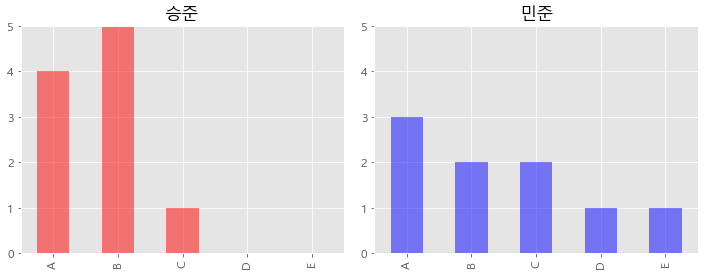

In [111]:
# 점수 내림차순으로 데이터 정리
# 결측제거, Y축을 100점, 컬러 다르게 주기, X축 제목 삭제
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

credit_sum['윤승준'].plot(kind='bar', ax=axes[0], color='red', alpha=0.5)
credit_sum['윤민준'].plot(kind='bar', ax=axes[1], color='blue', alpha=0.5)

axes[0].set_title('승준')
axes[0].set_xlabel('')
axes[0].set_ylim(0,5)
axes[1].set_title('민준')
axes[1].set_xlabel('')
axes[1].set_ylim(0,5)

fig.tight_layout()
plt.show()

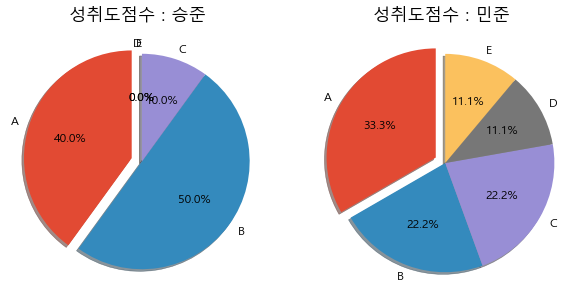

In [113]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'A', 'B', 'C', 'D', 'E'
sizes_sj = credit_sum['윤승준'].values
sizes_mj = credit_sum['윤민준'].values

explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].pie(sizes_sj, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

axes[1].pie(sizes_mj, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


axes[0].set_title('성취도점수 : 승준')
axes[1].set_title('성취도점수 : 민준')

plt.show()

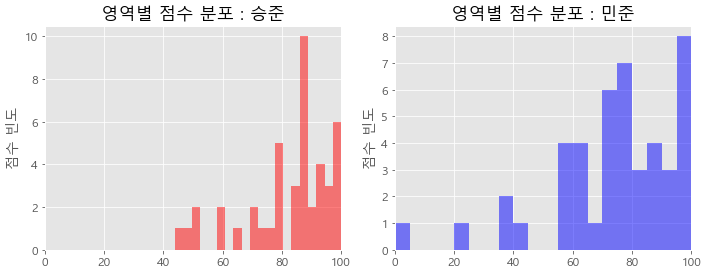

In [152]:
ysj = df[df['name']=='윤승준']['score100']
ymj = df[df['name']=='윤민준']['score100']

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ysj.plot.hist(ax=axes[0], color='red', alpha=0.5, bins=20)  # normed=True
ymj.plot.hist(ax=axes[1], color='blue', alpha=0.5, bins=20) # normed=True

axes[0].set_title('영역별 점수 분포 : 승준')
axes[0].set_xlabel('')
axes[0].set_ylabel('점수 빈도')
axes[0].set_xlim(0,100)
axes[1].set_title('영역별 점수 분포 : 민준')
axes[1].set_xlabel('')
axes[1].set_ylabel('점수 빈도')
axes[1].set_xlim(0,100)

fig.tight_layout()
plt.show()

### Seaborn으로 더 깊게 보기

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


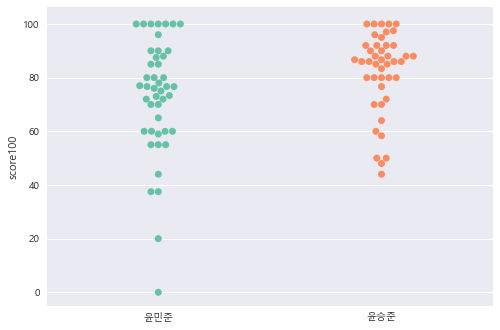

In [247]:
# 둘 간의 점수 분포는 어떨까?
ax = sns.swarmplot(x='name', y='score100',
                   data=df, palette="Set2", size=7) # dodge=True
ax.set_xlabel('')
ax.legend(loc='lower right');

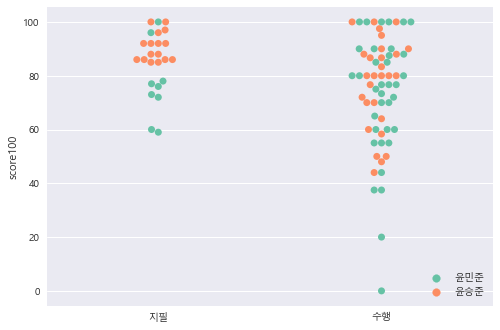

In [246]:
# 지필과 수행으로 나눠보자
ax = sns.swarmplot(x='sub_group', y='score100', hue='name',
                   data=df, palette="Set2", size=7) # dodge=True
ax.set_xlabel('')
ax.legend(loc='lower right');

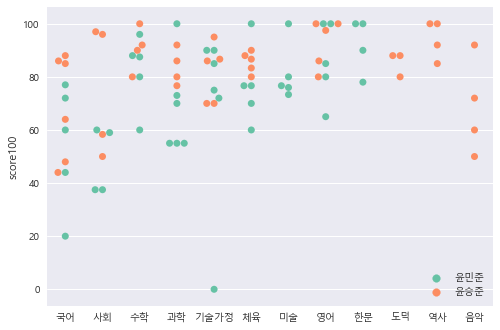

In [248]:
# 과목별 점수 분포는...?
ax = sns.swarmplot(x='sub1', y='score100', hue='name',
                   data=df, palette="Set2", size=7) # dodge=True
ax.set_xlabel('')
ax.legend(loc='lower right');

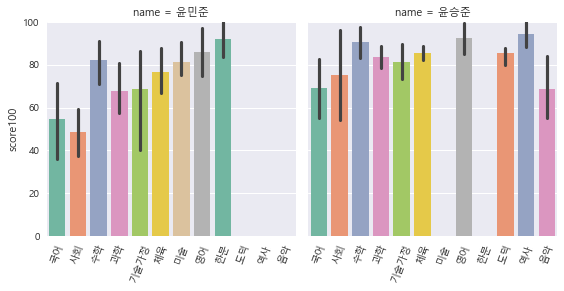

In [245]:
# 과목별 막대를 참조하면, 
# 세부과목별 분산이 큰 과목을 한 눈에 파악할 수 있다
g = sns.factorplot(x='sub1', y='score100', col='name', 
                   data=df, kind='bar', palette="Set2", size=4) # dodge=True
(g.set_axis_labels("")
  .set(ylim=(0, 100))
  .set_xticklabels(rotation=70)
)  
# https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

---
### 2. 학년 전체 평균 비교 분석

---

In [300]:
# 나의 점수, 학년 평균
my_score = df.groupby(['name','sub1'])['score100_wt'].sum()

# 학년 평균
avg_score = df.groupby(['name','sub1'])['class_avg'].mean()

# 나의 점수 + 학년 평균 : 예체능 제외
score_total = pd.concat([my_score, avg_score], axis=1).dropna()
score_total['gap'] = score_total['score100_wt'] - score_total['class_avg']
score_total

score100_wt  class_avg    gap
name sub1                               
윤민준  과학          70.00       68.9   1.10
     국어          63.00       68.4  -5.40
     기술가정        69.50       71.2  -1.70
     사회          50.50       70.8 -20.30
     수학          89.50       67.8  21.70
     영어          89.50       71.7  17.80
     한문          88.00       72.2  15.80
윤승준  과학          85.00       71.4  13.60
     국어          75.70       75.1   0.60
     기술가정        83.00       76.9   6.10
     도덕          86.00       78.0   8.00
     사회          84.05       71.5  12.55
     수학          93.80       66.9  26.90
     역사          90.80       68.8  22.00
     영어          92.40       64.5  27.90

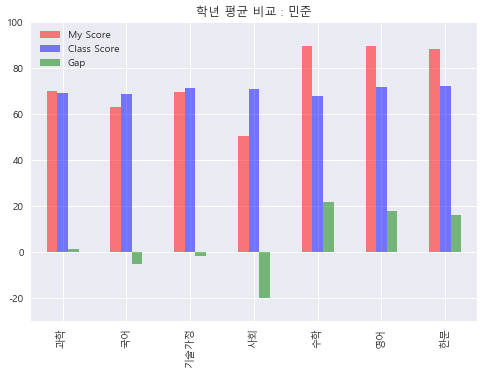

In [296]:
# 민준군 성과는...?
matplotlib.rcParams['axes.unicode_minus'] = False  # 차트에서 음수 표기 제대로 되도록...

score_total_mj = score_total.loc['윤민준']   # indexing~! 
score_total_mj.columns = ['My Score', 'Class Score', 'Gap']

ax = score_total_mj.plot.bar(color=['red', 'blue', 'green'], alpha=0.5)

ax.set_title('학년 평균 비교 : 민준')
ax.set_ylim(-30,100)
ax.set_xlabel('')
ax.legend(loc='best')

plt.show()

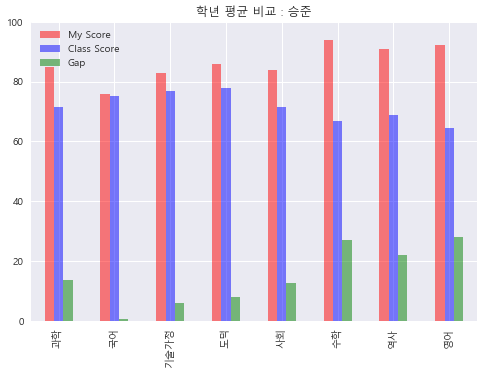

In [297]:
# 승준군 성과는...?
score_total_mj = score_total.loc['윤승준']   # indexing~! 
score_total_mj.columns = ['My Score', 'Class Score', 'Gap']

ax = score_total_mj.plot.bar(color=['red', 'blue', 'green'], alpha=0.5)

ax.set_title('학년 평균 비교 : 승준')
ax.set_ylim(0,100)
ax.set_xlabel('')
ax.legend(loc='best')

plt.show()

---
### 3. 수행/지필 점수 상세 분석

---

In [118]:
# 지필, 수행 점수 비교
# js_score = pd.crosstab(df['sub_group'], df['name'], values=df['score100'], aggfunc=np.mean, margins=True)
js_score = pd.crosstab(df['name'], df['sub_group'], values=df['score100'], aggfunc=np.mean, margins=True)
js_score

sub_group,수행,지필,All
name,,,
윤민준,72.078704,76.777778,73.018519
윤승준,77.434524,90.687500,82.253788
All,74.421875,85.680000,77.584270


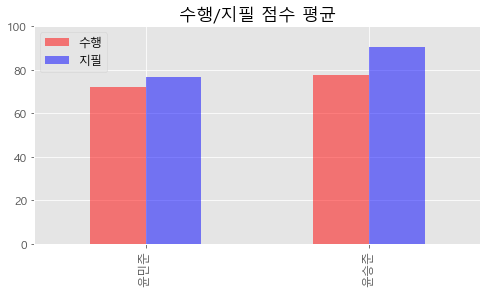

In [135]:
fig, ax = plt.subplots(figsize=(8, 4))

js_score.iloc[:2,:2].plot.bar(ax=ax, color=['red', 'blue'], alpha=0.5)

ax.set_title('수행/지필 점수 평균')
ax.set_ylim(0,100)
ax.set_xlabel('')
ax.legend(loc='best')

plt.show()

---
### 3. 과목별 상세 분석

---

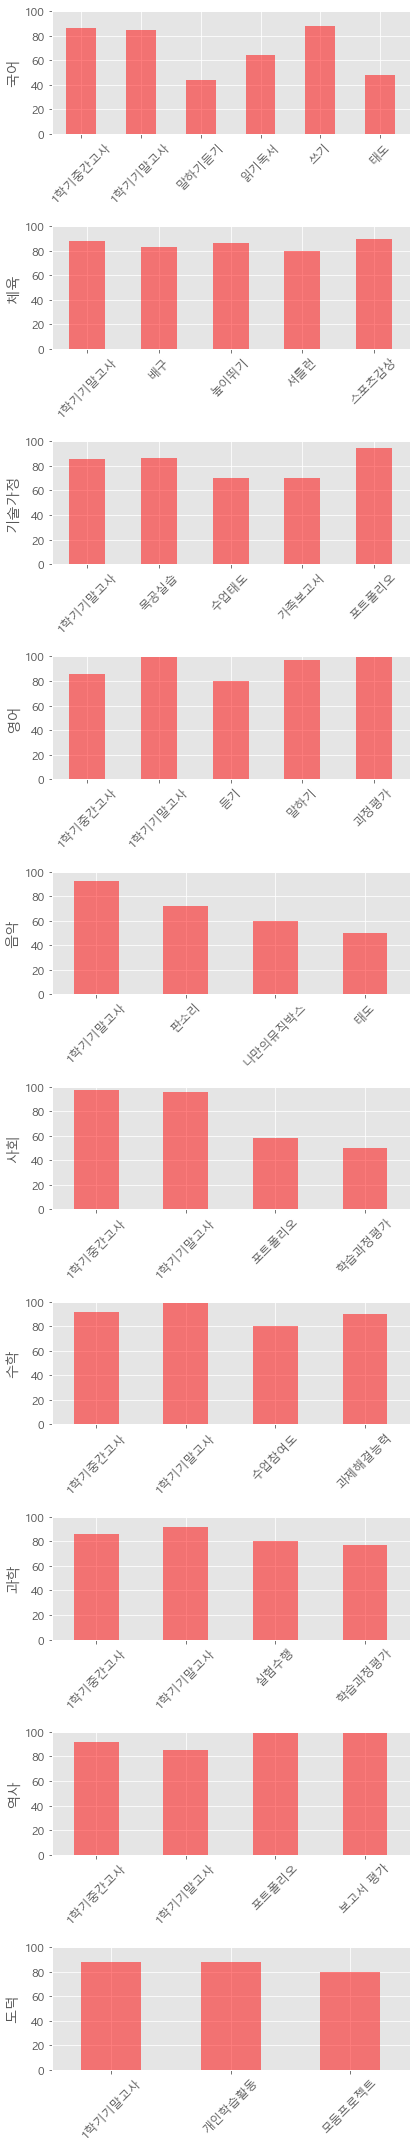

In [179]:
# 과목별 세부 점수 : 승준
df_sj = df[df['name']=='윤승준']
# df_sj['sub1'].value_counts()
subj = ['국어','체육','기술가정','영어','음악','사회','수학','과학','역사','도덕']

# fig, axes = plt.subplots(nrows=len(subj)) # figsize=(6, 30)
fig, axes = plt.subplots(nrows=len(subj), figsize=(6, 30))

for i in range(len(subj)):
    ser = df_sj[df_sj['sub1']==subj[i]]['score100']
    ser.index = df_sj[df_sj['sub1']==subj[i]]['sub2']
    
    ser.plot(kind='bar', ax=axes[i], color='red', alpha=0.5)    
    axes[i].set_xlabel('')
    axes[i].set_ylabel(subj[i])
    axes[i].set_ylim(0,100)
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)
    
fig.tight_layout()
plt.show()

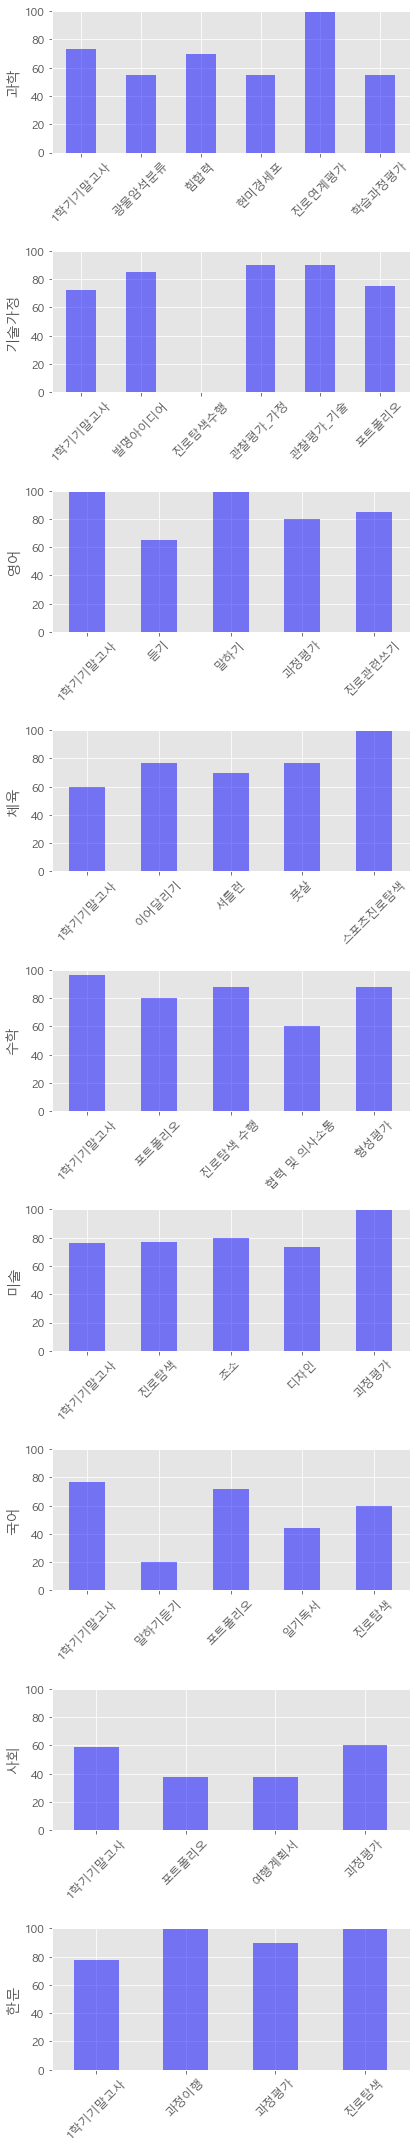

In [182]:
# 과목별 세부 점수 : 민준
df_sj = df[df['name']=='윤민준']
# df_sj['sub1'].value_counts()
subj = ['과학', '기술가정', '영어', '체육', '수학', '미술', '국어', '사회', '한문']

# fig, axes = plt.subplots(nrows=len(subj)) # figsize=(6, 30)
fig, axes = plt.subplots(nrows=len(subj), figsize=(6, 30))

for i in range(len(subj)):
    ser = df_sj[df_sj['sub1']==subj[i]]['score100']
    ser.index = df_sj[df_sj['sub1']==subj[i]]['sub2']
    
    ser.plot(kind='bar', ax=axes[i], color='blue', alpha=0.5)    
    axes[i].set_xlabel('')
    axes[i].set_ylabel(subj[i])
    axes[i].set_ylim(0,100)
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)
    
fig.tight_layout()
plt.show()

---
### Epilogue : 주연배우 초상권을 마구 침해해서  분석했습니다... ^^;;;

---

<img src="DSC_brothers.jpg" style="width: 600px;">